### Demo 
#### Week 1: Lecture 2

We want to understand the five steps of the data science process. Along the way, we want to get experience with 

- histograms and line charts
- counting and probability
- running Jupyter Notebooks 

If the details of the code don't make sense, then you should not worry about it because we will study these aspects of Python together throughout the semester. By Week 16, you should not only be able to run the Jupyter Notebook but you should be able to modify and extend it for your own work! Remember that 

- Python is one of many tools for data science. Don't get stuck on the specific of Python.
- We will work backwards from the examples to develop the programming tools 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('precision', 2)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('talk')

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

### Step 1: Formulate 

What information about gender and age could we determine from names? In particular, what guesses can we make about the sample based on the administrative dataset? 

**Question** 

What might be a connection between gender and name? What might be a connection between age and name?

#YOUR RESPONSE HERE
Certain names may be historically attached to male or female

Certain names may be more prevelant at a certain time in history

### Step 2: Collect and Process the Data  

In [8]:
students = pd.read_csv('roster_first_names.csv')
students['Name'] = students['Name'].str.lower()

In [9]:
def random_name(number):
    return ", ".join(np.random.choice(students['Name'], size = number, replace = False))

In [10]:
interact(random_name, number=5);

interactive(children=(IntSlider(value=5, description='number', max=15, min=-5), Output()), _dom_classes=('widg…

In [11]:
print(f"There are {len(students)} students on the roster.")

There are 99 students on the roster.


**Question** 

 - How many students are in the class?
 - How can you read the dataset `babynames.csv`. Call the result table `babynames`

In [12]:
# YOUR RESPONSE HERE
99

99

In [41]:
# YOUR CODE HERE


### Step 3: Understand the Data through Tables and Charts  

### Examining a Table

Use the widget to pane through the data. How would you describe the entries? 

In [ ]:
df_interact(babynames)

Let's determine the distribution of lengths of names in the sample using a **histogram**

### Examining a Table

Would length of name be an indicator of person? 

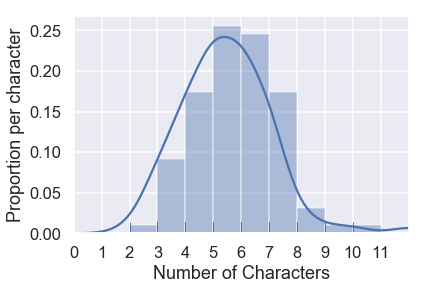

In [11]:
sns.distplot(students['Name'].str.len(),
             rug=True,
             bins=np.arange(12),
             axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.gca().set_ylabel('Proportion per character');

### Gender

Let's understand the distribution of gender over time.

In [12]:
pivot_year_name_count = pd.pivot_table(
    babynames, index='Year', columns='Gender',
    values='Count', aggfunc=np.sum)

In [14]:
pivot_year_name_count

Gender,F,M
Year,,
1880,9.10e+04,1.10e+05
1881,9.20e+04,1.01e+05
1882,1.08e+05,1.14e+05
1883,1.12e+05,1.05e+05
1884,1.29e+05,1.14e+05
1885,1.33e+05,1.08e+05
1886,1.45e+05,1.11e+05
...,...,...
1983,1.67e+06,1.79e+06


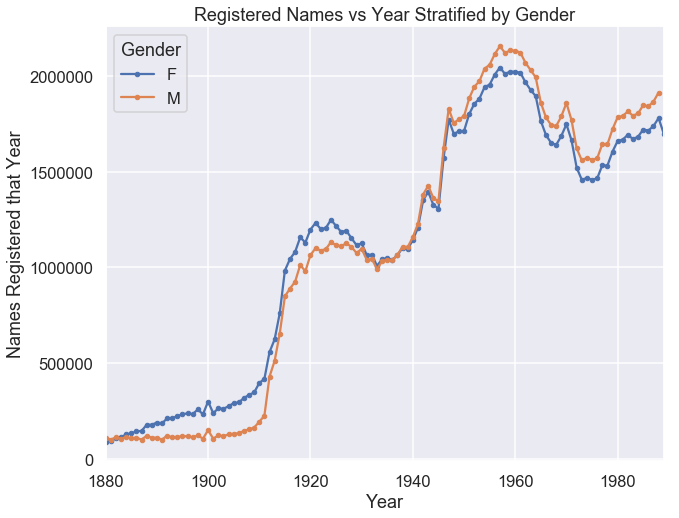

In [15]:
pivot_year_name_count.plot(marker=".", figsize = (10,8))
plt.title("Registered Names vs Year Stratified by Gender")
plt.gca().set_ylabel('Names Registered that Year');

In [16]:
babynames['Name'] = babynames['Name'].str.lower()

gender_counts = pd.pivot_table(babynames, index='Name', columns='Gender', values='Count',
                            aggfunc='sum', fill_value=0., margins=True)
gender_counts

Gender,F,M,All
Name,,,
aadam,0,10,10
aadil,0,6,6
aage,0,7,7
aagot,5,0,5
aaisha,35,0,35
aakash,0,62,62
aaliya,5,0,5
...,...,...,...
zygmund,0,168,168


In [17]:
prop_female = gender_counts['F'] / gender_counts['All']
gender_counts['prop_female'] = prop_female
gender_counts

Gender,F,M,All,prop_female
Name,,,,
aadam,0,10,10,0.00
aadil,0,6,6,0.00
aage,0,7,7,0.00
aagot,5,0,5,1.00
aaisha,35,0,35,1.00
aakash,0,62,62,0.00
aaliya,5,0,5,1.00
...,...,...,...,...
zygmund,0,168,168,0.00


In [18]:
def gender_from_name(name):
    if name in gender_counts.index:
        prop = gender_counts.loc[name, 'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

gender_from_name('daniel')

'M'

In [20]:
interact(gender_from_name, name='chris');

'M'

In [19]:
students['Prediction_gender'] = students['Name'].apply(gender_from_name)
students.head()

,Name,Site Role,Prediction_gender
0,adia,Student,F
1,aditya,Student,M
2,andy,Student,M
3,anya,Student,F
4,avery,Student,M


### Probability of Gender

In [20]:
count_by_sex = students['Prediction_gender'].value_counts().to_frame()
count_by_sex

,Prediction_gender
M,46
Name not in dataset,31
F,22


Why would so many names be missing?

In [23]:
count_by_sex = count_by_sex.loc[['M','F'],:]
count_by_sex

,Prediction_gender
M,46
F,22


In [24]:
count_by_sex.loc['F','Prediction_gender'] / ( count_by_sex.loc['F','Prediction_gender'] + count_by_sex.loc['M','Prediction_gender'])

0.3235294117647059

$$ \large
\textbf{P}\hspace{0pt}(\texttt{Female} ) = \frac{\textbf{Count}(\texttt{Female})}{\textbf{Count}(\texttt{Male or Female})}
$$

### Age

In [25]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (
    babynames
    .groupby('Name')
    .apply(avg_year)
    .rename('avg_year')
    .to_frame()
)
avg_years

,avg_year
Name,
aadam,1987.50
aadil,1985.00
aage,1915.00
aagot,1915.00
aaisha,1985.37
aakash,1984.74
aaliya,1988.00
...,...
zygmont,1919.16


In [37]:
def age_from_name(name):
    if name in avg_years.index:
        value = int(avg_years.loc[name, 'avg_year'])
        years = (dt.now() - dt(value,1,1)).days // 365 
        return years
    else:
        return 'Name not in dataset'

In [40]:
interact(age_from_name, name='daniel');

57

In [41]:
students['Prediction_age'] = students['Name'].apply(age_from_name)
students.head()

,Name,Site Role,Prediction_gender,Prediction_age
0,adia,Student,F,42
1,aditya,Student,M,36
2,andy,Student,M,62
3,anya,Student,F,42
4,avery,Student,M,63


### Probability of Age

Calculate probability through counting occurences

$$ \large
\textbf{P}\hspace{0pt}(\texttt{Year} \,\,\, | \,\,\, \texttt{Name} ) = \frac{\textbf{Count}(\texttt{Year and Name})}{\textbf{Count}(\texttt{Name})}
$$

In [26]:
name_year_pivot = babynames.pivot_table( 
        index=['Year'], columns=['Name'], values='Count', aggfunc=np.sum).fillna(0.0)
name_year_pivot.tail()

Name,aadam,aadil,aage,aagot,aaisha,...,zygmunt,zykia,zylpha,zylphia,zyndall
Year,,,,,,,,,,,
1985,0.0,6.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0
1987,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1988,5.0,0.0,0.0,0.0,10.0,...,0.0,7.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [27]:
prob_year_given_name = name_year_pivot.div(name_year_pivot.sum()).fillna(0.0)
prob_year_given_name.tail()

Name,aadam,aadil,aage,aagot,aaisha,...,zygmunt,zykia,zylpha,zylphia,zyndall
Year,,,,,,,,,,,
1985,0.0,1.0,0.0,0.0,0.34,...,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.20,...,0.0,0.0,0.0,0.0,0.0
1987,0.5,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0
1988,0.5,0.0,0.0,0.0,0.29,...,0.0,1.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0


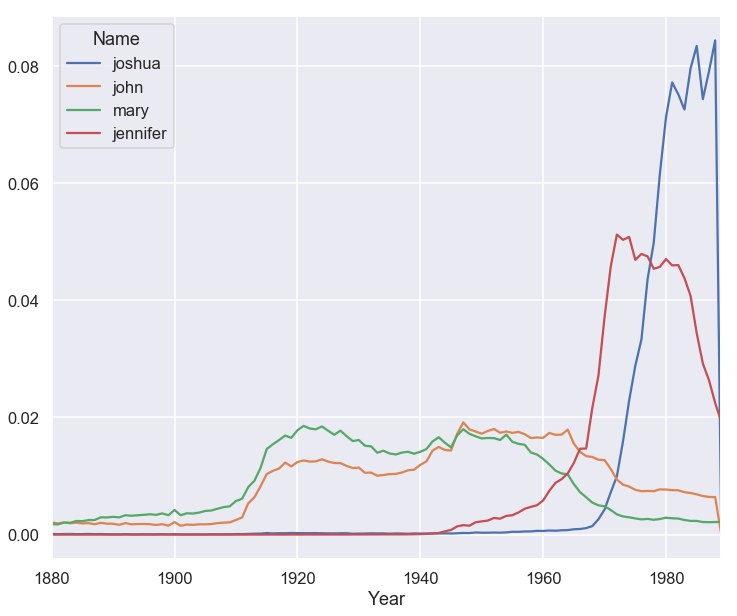

In [28]:
prob_year_given_name[["joshua", "john", "mary", "jennifer"]].plot(figsize=(12,10));